In [1]:
import numpy as np
import pandas as pd

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn import svm
from sklearn.model_selection import cross_val_score

/Users/chengjielin/tensorflow/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
price = pd.read_csv("price_data.csv",encoding = "ISO-8859-1")
news = pd.read_csv("news_data.csv",encoding = "ISO-8859-1")

In [3]:
price.head()

,id,price,timestamp,exchange
0,1,6999.8,1523132235,cex
1,1,6984.1,1523133211,cex
2,1,6984.1,1523133241,cex
3,1,6984.1,1523133272,cex
4,1,6984.1,1523133303,cex


In [4]:
news.head()

,title,time,text,weight,source
0,twitter_post,1523133939,I tested a new utility token out there - Synap...,0,twitter
1,twitter_post,1523133938,RT @SDWouters: 10 months ago #Bitcoin had 7k f...,28,twitter
2,twitter_post,1523133937,bitcoin cash 32 Megabyte Block Size Increase a...,0,twitter
3,twitter_post,1523133937,What is blockchain - the technology behind Bit...,0,twitter
4,twitter_post,1523133936,RT @Viking7070: Local governments are starting...,3,twitter


In [5]:
price = price.drop(['id','exchange'], 1)
price=price.sort_values(by=['timestamp'],ascending=True)
price.head()

,price,timestamp
0,6999.8,1523132235
1,6984.1,1523133211
2,6984.1,1523133241
3,6984.1,1523133272
4,6984.1,1523133303


In [ ]:
price.head()

In [ ]:
price.head(30)

In [6]:
price = price[price.price.notnull()]
price.head()

,price,timestamp
0,6999.8,1523132235
1,6984.1,1523133211
2,6984.1,1523133241
3,6984.1,1523133272
4,6984.1,1523133303


In [7]:
price.head(30)

,price,timestamp
0,6999.8,1523132235
1,6984.1,1523133211
2,6984.1,1523133241
3,6984.1,1523133272
4,6984.1,1523133303
5,6984.1,1523133334
6,6983.6,1523133364
7,6983.1,1523133395
8,6983.1,1523133425
9,6983.1,1523133456


In [8]:
price_label = []
headlines = []
for row in price.iterrows():
    daily_headlines = []
    timestamp = row[1]['timestamp']
    price_label.append(row[1]['price'])
    i=0
    for row_ in news[news.time<=timestamp].iterrows() and news[news.time>(timestamp-30)].iterrows():
        #print (row_[1]['weight'])
        if(i<30):
            i=i+1
            daily_headlines.append(row_[1]['text'])
        else:
            continue
            
    justb = np.array(daily_headlines)
    #print (justb.shape)
    headlines.append(justb)
       #daily_headlines.append(row_[1]['text'])
       # justb = np.array(daily_headlines)
       # print (justb.shape)

In [9]:
headlines = np.array(headlines)
headlines.shape

(6091, 30)

In [10]:
print(headlines[0])

[ 'I tested a new utility token out there - SynapseAI \r\rDecentralized AI Network -Train automation. Get paid forever.\x89Û_ https://t.co/EJVCtMQ9Y6'
 'RT @SDWouters: 10 months ago #Bitcoin had 7k full nodes vs. 11k today.\rIn the same timeframe #Ethereum went from 25k full nodes to 15k.\r\rMa\x89Û_'
 'bitcoin cash 32 Megabyte Block Size Increase and Op-Code Additions\r\rhttps://t.co/JAPAP9WiiQ'
 'What is blockchain - the technology behind Bitcoin?  https://t.co/cS21jZrjgQ \r\r#blockchain #blockchaintechnology\x89Û_ https://t.co/EODfA86VnK'
 'RT @Viking7070: Local governments are starting to understand.  https://t.co/EKpigTfev6'
 'RT @Applancer_pro: Bitcoin finally opens us to new opportunities https://t.co/cvFj6vOinL via @applancer_crypt'
 "RT @tvtwocom: What's so special about Interactive Coin Offering? https://t.co/LQu8sPsfzR // #tvrevolution #crypto #cryptocurrencies #bitcoi\x89Û_"
 "@NickBakhuis @NZXT That's the very cpu I have my eye on.... Just waiting on bitcoin gaining some v

In [11]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [12]:
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'0,0', '00', text) 
    text = re.sub(r'[_"\-;%()|.,+&=*%.,!?:#@\[\]]', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\$', ' $ ', text)
    text = re.sub(r'u s ', ' united states ', text)
    text = re.sub(r'u n ', ' united nations ', text)
    text = re.sub(r'u k ', ' united kingdom ', text)
    text = re.sub(r'j k ', ' jk ', text)
    text = re.sub(r' s ', ' ', text)
    text = re.sub(r' yr ', ' year ', text)
    text = re.sub(r' l g b t ', ' lgbt ', text)
    text = re.sub(r'0km ', '0 km ', text)
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

In [13]:
import re
from nltk.corpus import stopwords
clean_headlines = []

for daily_headlines in headlines:
    clean_daily_headlines = []
    for headline in daily_headlines:
        clean_daily_headlines.append(clean_text(headline))
    clean_headlines.append(clean_daily_headlines)

In [14]:
clean_headlines = np.array(clean_headlines)
clean_headlines.shape

(6091, 30)

In [16]:
clean_headlines[0]

array([ 'tested new utility token synapseai decentralized ai network train automation get paid forever \x89û https //t co/ejvctmq9y6',
       'rt sdwouters 10 months ago bitcoin 7k full nodes vs 11k today timeframe ethereum went 25k full nodes 15k ma\x89û',
       'bitcoin cash 32 megabyte block size increase op code additions https //t co/japap9wiiq',
       'blockchain technology behind bitcoin https //t co/cs21jzrjgq blockchain blockchaintechnology\x89û https //t co/eodfa86vnk',
       'rt viking7070 local governments starting understand https //t co/ekpigtfev6',
       'rt applancer pro bitcoin finally opens us new opportunities https //t co/cvfj6voinl via applancer crypt',
       'rt tvtwocom special interactive coin offering https //t co/lqu8spsfzr // tvrevolution crypto cryptocurrencies bitcoi\x89û',
       'nickbakhuis nzxt cpu eye waiting bitcoin gaining value before\x89û https //t co/aeo5gceot6',
       'cryptolexi negative sentiment stock market bitcoin plunge lot charts pro

In [17]:
def add_avg_sentiment_list(data):
    sid = SentimentIntensityAnalyzer()
    avgs = []
    for i in range(0,len(data)):
        inner_avg=[]
        for j in range(0,len(data[0])):
            sentiments=(sid.polarity_scores(str(data[i][j]))['compound'])
            inner_avg.append(float(sentiments))
        avgs.append(inner_avg)
    avgs = np.array(avgs)
    print(avgs.shape)
    return avgs

In [18]:
sentiment_included = add_avg_sentiment_list(clean_headlines)
print("sentiment_include")
print(sentiment_included.shape)

(6091, 30)
sentiment_include
(6091, 30)


In [21]:
print(sentiment_included[:10])

[[ 0.      0.     -0.1531  0.      0.      0.3818  0.4019  0.6369 -0.5719
   0.      0.6832  0.      0.      0.      0.743   0.802   0.     -0.6486
   0.      0.7003  0.2732  0.296   0.8126  0.4404  0.7579  0.      0.      0.
  -0.2732  0.768 ]
 [ 0.      0.     -0.1531  0.      0.      0.3818  0.4019  0.6369 -0.5719
   0.      0.6832  0.      0.      0.      0.743   0.802   0.     -0.6486
   0.      0.7003  0.2732  0.296   0.8126  0.4404  0.7579  0.      0.      0.
  -0.2732  0.768 ]
 [ 0.      0.     -0.1531  0.      0.      0.3818  0.4019  0.6369 -0.5719
   0.      0.6832  0.      0.      0.      0.743   0.802   0.     -0.6486
   0.      0.7003  0.2732  0.296   0.8126  0.4404  0.7579  0.      0.      0.
  -0.2732  0.768 ]
 [ 0.      0.     -0.1531  0.      0.      0.3818  0.4019  0.6369 -0.5719
   0.      0.6832  0.      0.      0.      0.743   0.802   0.     -0.6486
   0.      0.7003  0.2732  0.296   0.8126  0.4404  0.7579  0.      0.      0.
  -0.2732  0.768 ]
 [ 0.      0.     -0

In [20]:
print(price_label[0:10])

[6999.8000000000002, 6984.1000000000004, 6984.1000000000004, 6984.1000000000004, 6984.1000000000004, 6984.1000000000004, 6983.6000000000004, 6983.1000000000004, 6983.1000000000004, 6983.1000000000004]


AttributeError: 'list' object has no attribute 'shape'

In [22]:
mylist_label = np.asarray((price_label))
print(mylist_label[0:10])
print(mylist_label.shape)

[ 6999.8  6984.1  6984.1  6984.1  6984.1  6984.1  6983.6  6983.1  6983.1
  6983.1]
(6091,)


In [23]:
def divide_train_test(data):
	train = data[:4500]
	test = data[4500:]
	return train, test

In [24]:
train_set, test_set = divide_train_test(sentiment_included)

In [25]:
print("train_set")
print(train_set.shape)

train_set
(4500, 30)


In [26]:
def divide_train_label(data):
	train = data[:4500]
	test = data[4500:]
	return train, test

In [27]:
train_label, test_label = divide_train_test(mylist_label)

In [28]:
print("train_labels")
print(train_label.shape)
print(train_label[0:30])

train_labels
(4500,)
[ 6999.8  6984.1  6984.1  6984.1  6984.1  6984.1  6983.6  6983.1  6983.1
  6983.1  6983.1  6983.1  6983.1  6983.1  6983.1  6983.1  6983.1  6983.1
  6983.1  6983.1  6983.1  6983.1  6983.1  6983.1  6994.   6997.6  6997.6
  6978.4  6982.9  6958.6]


In [29]:
print("test_labels")
print(test_label.shape)
print(test_label[0:])

test_labels
(1591,)
[ 8195.2  8195.2  8195.3 ...,  8277.   8291.8  8291.4]


In [30]:
print("test_set")
print(test_set.shape)

test_set
(1591, 30)


In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


Using TensorFlow backend.


In [32]:
import numpy

In [33]:
def train(data, labels):
	print(data.shape)
	print(labels.shape)
	X = numpy.reshape(data, (len(data), 1, 30))
# normalize
	#X = X / float(len(alphabet))
# one hot encode the output variable
	#y = np_utils.to_categorical(dataY)
# create and fit the model
	model = Sequential()
	model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
	model.add(Dense(1, activation='softmax'))
	model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
	model.fit(X,labels, epochs=30, batch_size=1, verbose=2)
	return model

In [36]:
train_label=numpy.reshape(train_label, (len(train_label),1))
print (train_label.shape)
print (train_set.shape)
print (train_label[0:10])
print (train_set[0:30])

(4500, 1)
(4500, 30)
[[ 6999.8]
 [ 6984.1]
 [ 6984.1]
 [ 6984.1]
 [ 6984.1]
 [ 6984.1]
 [ 6983.6]
 [ 6983.1]
 [ 6983.1]
 [ 6983.1]]
[[ 0.      0.     -0.1531  0.      0.      0.3818  0.4019  0.6369 -0.5719
   0.      0.6832  0.      0.      0.      0.743   0.802   0.     -0.6486
   0.      0.7003  0.2732  0.296   0.8126  0.4404  0.7579  0.      0.      0.
  -0.2732  0.768 ]
 [ 0.      0.     -0.1531  0.      0.      0.3818  0.4019  0.6369 -0.5719
   0.      0.6832  0.      0.      0.      0.743   0.802   0.     -0.6486
   0.      0.7003  0.2732  0.296   0.8126  0.4404  0.7579  0.      0.      0.
  -0.2732  0.768 ]
 [ 0.      0.     -0.1531  0.      0.      0.3818  0.4019  0.6369 -0.5719
   0.      0.6832  0.      0.      0.      0.743   0.802   0.     -0.6486
   0.      0.7003  0.2732  0.296   0.8126  0.4404  0.7579  0.      0.      0.
  -0.2732  0.768 ]
 [ 0.      0.     -0.1531  0.      0.      0.3818  0.4019  0.6369 -0.5719
   0.      0.6832  0.      0.      0.      0.743   0.802   

In [35]:
clsfr = train(train_set, train_label)
print("Training done.")

(4500, 30)
(4500, 1)
Epoch 1/30
28s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 2/30
28s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 3/30
27s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 4/30
26s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 5/30
26s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 6/30
26s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 7/30
28s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 8/30
28s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 9/30
27s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 10/30
26s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 11/30
25s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 12/30
25s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 13/30
27s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 14/30
25s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 15/30
25s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 16/30
25s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 17/30
25s - loss: 63991646.7849 - acc: 0.0000e+00
Epoch 18/30
25s - loss: 63991646.784

In [37]:
print(clsfr)

In [38]:
def cross_validate(data, labels, clsfr):
	return cross_val_score(clsfr, data, labels, cv=5)

In [41]:
predictions = clsfr.predict(numpy.reshape(train_set, (len(train_set), 1, 30)), verbose = True) 

3520/4500 [======================>.......] - ETA: 0s

In [44]:
print(predictions[0:10])
print(train_label[0:10])

[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
[[ 6999.8]
 [ 6984.1]
 [ 6984.1]
 [ 6984.1]
 [ 6984.1]
 [ 6984.1]
 [ 6983.6]
 [ 6983.1]
 [ 6983.1]
 [ 6983.1]]


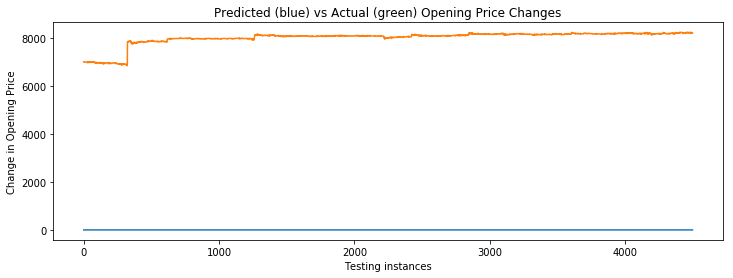

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(predictions)
plt.plot(train_label)
plt.title("Predicted (blue) vs Actual (green) Opening Price Changes")
plt.xlabel("Testing instances")
plt.ylabel("Change in Opening Price")
plt.show()

In [51]:
def svmtrain(data, labels):
	print(data.shape)
	print(labels.shape)
	return svm.SVR(kernel='linear', C=1).fit(data, labels)

In [46]:
print (train_label.shape)
print (train_set.shape)

(4500, 1)
(4500, 30)


In [52]:
svmclsfr = svmtrain(train_set, train_label)

(4500, 30)
(4500, 1)


/Users/chengjielin/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
svmpredictions = svmclsfr.predict(train_set) 
print(svmpredictions[0:10])
print(train_label[0:10])

[ 7589.70073981  7589.70073981  7589.70073981  7589.70073981  7589.70073981
  7589.70073981  7589.70073981  7589.70073981  7589.70073981  7589.70073981]
[[ 6999.8]
 [ 6984.1]
 [ 6984.1]
 [ 6984.1]
 [ 6984.1]
 [ 6984.1]
 [ 6983.6]
 [ 6983.1]
 [ 6983.1]
 [ 6983.1]]


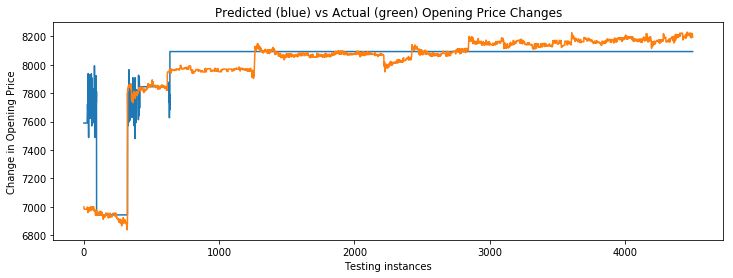

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(svmpredictions)
plt.plot(train_label)
plt.title("Predicted (blue) vs Actual (green) Opening Price Changes")
plt.xlabel("Testing instances")
plt.ylabel("Change in Opening Price")
plt.show()